# Model QUBO

**Quadratic Unconstrained Binary Optimization (QUBO)** to model matematyczny stosowany do rozwiązywania problemów optymalizacji kombinatorycznej. Jak sugeruje nazwa, dotyczy on modeli, w których występują zależności kwadratowe między zmiennymi, brak ograniczeń, a zmienne są binarne. Ten opis obejmuje zaskakująco dużą klasę problemów, takich jak MAX-CUT, problem komiwojażera czy harmonogramowanie zadań.  

## Definicja  
Model QUBO można wyrazić za pomocą następującego problemu optymalizacyjnego. Dla danej symetrycznej macierzy $Q$, należy znaleźć binarny wektor $\bm{x}^*$, taki że:  

$$ \bm{x}^* = \arg \min_x \bm{x}Q\bm{x}^T = \sum_i \sum_j Q_{i,j} x_i x_j$$  

Często przekształca się macierz $Q$ do formy górnotrójkątnej, co można osiągnąć bez utraty ogólności w następujący sposób. Dla wszystkich $i$, $j$, gdzie $j > i$, zastępuje się $Q_{ij}$ przez $Q_{ij} + Q_{ji}$. Następnie wszystkie $Q_{ji}$ dla $j < i$ zamienia się na 0.  

Warto zauważyć, że dla zmiennych binarnych zachodzi $x^2 = x$. Pozwala to podzielić QUBO na część liniową znajdującą się na diagonali oraz część kwadratową:  

$$ \bm{x}Q\bm{x}^T =  \sum_i Q_{i,i} x_i + \sum_{i \neq j} Q_{i,j} x_i x_j$$

## Rozwiązywanie przykładowego QUBO

Ten pierwszy przykład stworzy podstawy do lepszego zrozumienia, w jaki sposób różne problemy mogą zostać przedstawione w formie QUBO.
Na początek rozważmy następujący problem optymalizacyjny:
$$
\text{minimalizować} \,\quad y = -5x_1 -3x_2 -8x_3 - 6x_4 + 4x_1x_2 + 8x_1x_3 + 2x_2x_3 + 10x_3x_4
$$

Dokonamy kilku obserwacji:  
1. Funkcja podlegająca minimalizacji składa się z części liniowej $-5x_1 -3x_2 -8x_3 - 6x_4$ oraz części kwadratowej $4x_1x_2 + 8x_1x_3 + 2x_2x_3 + 10x_3x_4$.  

2. Ponieważ dla zmiennych binarnych $x_i = x_i^2$, część liniową można zapisać jako:  
$$  
-5x_1^2 -3x_2^2 -8x_3^2 - 6x_4^2  
$$  

3. Następnie możemy przekształcić model do następującej postaci macierzowej:  
$$  
\text{minimalizować} \; y = [x_1 \, x_2 \, x_3 \, x_4] \begin{bmatrix}  
-5 & 4 & 8 & 0 \\  
0 & -3 & 2 & 0 \\  
0 & 0 & -8 & 10 \\  
0 & 0 & 0 & -6  
\end{bmatrix}  
\begin{bmatrix}  
x_1 \\  
x_2 \\  
x_3 \\  
x_4  
\end{bmatrix}  
$$  

4. Co można zapisać jako:  
$$  
y = \arg \min_x \bm{x}Q\bm{x}^T  
$$  
Należy zauważyć, że stosujemy tu konwencję zachowania $Q$ jako macierzy górnotrójkątnej.  

5. Poza ograniczeniami binarnymi na zmienne decyzyjne, QUBO jest modelem nieograniczonym, gdzie wszystkie dane problemu są zawarte w macierzy $Q$. Fakt ten sprawia, że model QUBO stanowi atrakcyjne ramy dla wielu problemów optymalizacyjnych.  

In [13]:
# Rozwiązemy ten problem metotą naiwnego wyczerpującego przeszukiwania

import numpy as np
from itertools import product
from math import inf
from copy import deepcopy

Q = np.array([[-5, 4, 8, 0], [0, -3, 2, 0], [0, 0, -8, 10], [0, 0, 0, -6]])

solution = inf
for x in product([0, 1], repeat=4):
    x = np.array(x)
    new_solution = x @ Q @ x.T
    if new_solution < solution:
        solution = deepcopy(new_solution)
        solution_vector = deepcopy(x)

print("rozwiązanie:", end = " ")
for idx, i in enumerate(solution_vector):
    print(f"x_{idx + 1} = {i},", end = " ")
print(f"\ny_min = {solution}")

rozwiązanie: x_1 = 1, x_2 = 0, x_3 = 0, x_4 = 1, 
y_min = -11


# Podobieństwo między QUBO a modelem Isinga

Podany powyżej wzór jest podejrzanie podobny do definicji modelu Isinga. Przypomnijmy, że definicja modelu Isinga jest następująca:

$$  
H(\textbf{s}) = \sum_{i < j} J_{ij} s_i s_j + \sum_i h_i s_i  
$$  

gdzie zakładamy, że $\textbf{J}$ jest macierzą górnotrójkątną, $i = 1, \ldots, N$, a $s_i = \pm 1$.  

W rzeczywistości rozwiązanie QUBO i znajdowanie stanów podstawowych modelu Isinga to równoważne problemy! Można je stosunkowo łatwo przekształcić między sobą za pomocą następującej substytucji:

$$  
x_i = \frac{s_i + 1}{2}  
$$  
$$  
s_i = 2x_i - 1  
$$  

Podstawiając te zmienne do odpowiednich wzorów, otrzymujemy:

$$  
Q_{ij} = 4 J_{ij}  
$$  
$$  
Q_{ii} = 2h_i - 2\sum_{j \neq i} J_{i,j}  
$$  

oraz

$$  
J_{ij} = \frac{1}{4} Q_{i,j}  
$$  
$$  
h_{i} = \frac{1}{2}Q_{i,i} + \frac{1}{4} \sum_{j \neq i} Q_{i,j}  
$$  

Należy pamiętać, że transformacja generuje pewną dodatkową stałą, więc uzyskane wartości funkcji celu nie mogą być porównywane bezpośrednio.

In [ ]:
# Zamiana między jednym a drugim modelem. 

## Przykład - zapisanie problemu konwijażera jako QUBO

$$
H_A = A \sum_{v=1}^n (1 - \sum_{j=1}^N x_{v, j})^2 + A \sum_{j=1}^n (1 - \sum_{v=1}^N x_{v, j})^2 + A \sum_{(u,v)\notin E} \sum_{j=1}^N x_{u,j}x_{v, j+1}
$$

$$
H_B = B \sum_{(u, v) \in E} W_{uv} \sum_{j=1}^N x_{u, j} x_{v, j}
$$

$$
H = H_A + H_B
$$

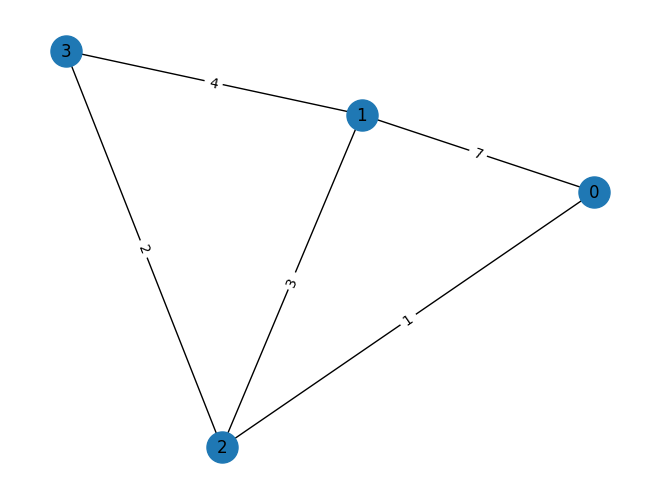

  (0, 0) (0, 1) (0, 2) (0, 3) (1, 0) (1, 1) (1, 2) ... (3, 3) energy num_oc.
0      1      0      0      0      0      1      0 ...      0  -94.8       1
1      0      1      0      0      1      0      0 ...      1  -94.8       1
2      0      0      0      1      0      0      1 ...      0  -94.8       1
3      0      0      1      0      0      1      0 ...      0  -94.8       1
4      1      0      0      0      0      0      0 ...      0  -94.8       1
5      0      0      0      1      0      0      1 ...      0  -94.8       1
6      0      0      0      1      1      0      0 ...      0  -94.8       1
7      0      0      0      1      0      0      1 ...      0  -94.8       1
8      0      1      0      0      1      0      0 ...      1  -94.8       1
9      0      0      0      1      0      0      1 ...      0  -94.8       1
['BINARY', 10 rows, 10 samples, 16 variables]


In [3]:
import dwave_networkx as dnx
import networkx as nx
import matplotlib.pyplot as plt
from dwave.samplers import SimulatedAnnealingSampler

def qubo_dict_to_matrix(qubo_dict):
    ...

G = nx.Graph()

G.add_weighted_edges_from({(0, 1, 7), (0, 2, 1), (1, 2, 3), (1, 3, 4), (2, 3, 2)})


pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=500)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.axis('off')
plt.show()

sampler = SimulatedAnnealingSampler()

QUBO = dnx.traveling_salesman_qubo(G)
sampleset = sampler.sample_qubo(QUBO, num_reads=10)
solution = sampleset

print(solution)
